## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mice = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
combined_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
unique_mice = combined_mice["Mouse ID"].unique()
len(unique_mice)

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_mice[combined_mice.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = combined_mice.drop_duplicates(["Mouse ID", "Timepoint"])
clean_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
unique_clean_mice = clean_mice["Mouse ID"].unique()
len(unique_clean_mice)

249

## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grp_mice_regimen = clean_mice.groupby(["Drug Regimen"])

mean_mice = grp_mice_regimen["Tumor Volume (mm3)"].mean()
med_mice = grp_mice_regimen["Tumor Volume (mm3)"].median()
var_mice = grp_mice_regimen["Tumor Volume (mm3)"].var()
std_mice = grp_mice_regimen["Tumor Volume (mm3)"].std()
sem_mice = grp_mice_regimen["Tumor Volume (mm3)"].sem()
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summ_stats_mice = pd.DataFrame({"Mean Tumor Volume": mean_mice,
                                "Median Tumor Volume": med_mice,
                                "Tumor Volume Variance": var_mice,
                                "Tumor Volume Standard Deviation": std_mice,
                                "Tumor Volume SEM":sem_mice
                               })
summ_stats_mice


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grp_mice_stats = clean_mice.groupby(["Drug Regimen"]).agg(["mean","median","var","std","sem"])
# This method produces everything in a single groupby function

grp_mice_stats["Tumor Volume (mm3)"]

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

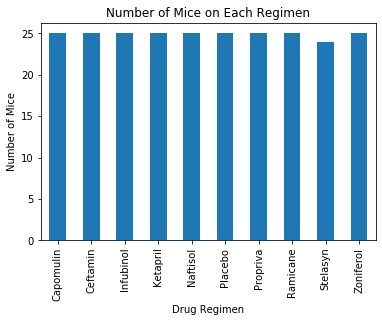

In [177]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_regimen = grp_mice_regimen[["Mouse ID"]].nunique()
mice_reg_plot = mice_per_regimen.plot(kind="bar", title="Number of Mice on Each Regimen", legend=False)
mice_reg_plot.set_ylabel("Number of Mice")

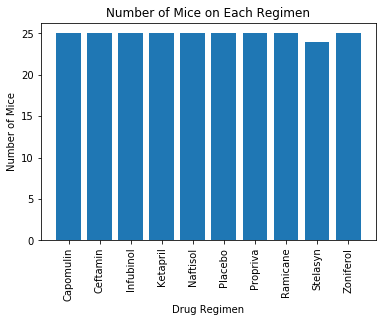

In [137]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
num_mice = mice_per_regimen["Mouse ID"].to_list()
regimen = mice_per_regimen.index
plt.title("Number of Mice on Each Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation=90)
plt.bar(regimen, num_mice)
plt.show()


Text(0, 0.5, '')

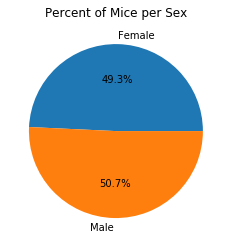

In [196]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grp_sex_mice = clean_mice.groupby(["Sex"])
count_sex_mice = grp_sex_mice[["Mouse ID"]].count()

mice_sex_plot = count_sex_mice.plot(y="Mouse ID", kind="pie", autopct="%1.1f%%", title="Percent of Mice per Sex", legend=False)
mice_sex_plot.set_ylabel("")

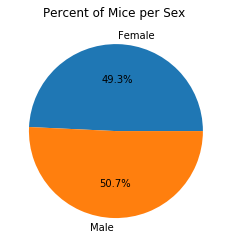

In [170]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = count_gender_mice.index
sizes = count_gender_mice["Mouse ID"].to_list()

plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title(" ")
plt.show()


## Quartiles, Outliers and Boxplots

In [311]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
four_regs = clean_mice.loc[(clean_mice["Drug Regimen"] == "Capomulin") | (clean_mice["Drug Regimen"] == "Ramicane")
                           | (clean_mice["Drug Regimen"] =="Infubinol") | (clean_mice["Drug Regimen"] =="Ceftamin")]
grp_mice_stats = four_regs.groupby(["Mouse ID"]).agg(["max"]).rename(columns={"max":"Max Timepoint"})
max_timepoint = grp_mice_stats["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mrg_time_regs = pd.merge(four_regs, max_timepoint, on="Mouse ID")
#mrg_time_regs
final_tum_vol_df = mrg_time_regs.loc[mrg_time_regs["Timepoint"] == mrg_time_regs["Max Timepoint"]]


cap_final_tum_vol_df = final_tum_vol_df.loc[final_tum_vol_df["Drug Regimen"] == "Capomulin"]
cap_final_tum_vol = cap_final_tum_vol_df["Tumor Volume (mm3)"]
ram_final_tum_vol_df = final_tum_vol_df.loc[final_tum_vol_df["Drug Regimen"] == "Ramicane"]
ram_final_tum_vol = ram_final_tum_vol_df["Tumor Volume (mm3)"]
inf_final_tum_vol_df = final_tum_vol_df.loc[final_tum_vol_df["Drug Regimen"] == "Infubinol"]
inf_final_tum_vol = inf_final_tum_vol_df["Tumor Volume (mm3)"]
cef_final_tum_vol_df = final_tum_vol_df.loc[final_tum_vol_df["Drug Regimen"] == "Ceftamin"]
cef_final_tum_vol = cef_final_tum_vol_df["Tumor Volume (mm3)"]

38.125164399999996

In [326]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_cap = cap_final_tum_vol.to_list()
tumor_vol_data_ram = ram_final_tum_vol.to_list()
tumor_vol_data_inf = inf_final_tum_vol.to_list()
tumor_vol_data_cef = cef_final_tum_vol.to_list()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles_cap = cap_final_tum_vol.quantile([.25,.5,.75])
lowerq_cap = quartiles_cap[0.25]
upperq_cap = quartiles_cap[0.75]
iqr_cap = upperq_cap-lowerq_cap
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)

quartiles_ram = ram_final_tum_vol.quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
iqr_ram = upperq_ram-lowerq_ram
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)

quartiles_inf = inf_final_tum_vol.quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
iqr_inf = upperq_inf-lowerq_inf
lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)

quartiles_cef = cef_final_tum_vol.quantile([.25,.5,.75])
lowerq_cef = quartiles_cef[0.25]
upperq_cef = quartiles_cef[0.75]
iqr_cef = upperq_cef-lowerq_cef
lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)

    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 
    
    # Determine outliers using upper and lower bounds
outlier_cap = cap_final_tum_vol_df.loc[(cap_final_tum_vol_df["Tumor Volume (mm3)"] < lower_bound_cap) | 
                                       (cap_final_tum_vol_df["Tumor Volume (mm3)"] > upper_bound_cap)]

outlier_ram = ram_final_tum_vol_df.loc[(ram_final_tum_vol_df["Tumor Volume (mm3)"] < lower_bound_ram) | 
                                       (ram_final_tum_vol_df["Tumor Volume (mm3)"] > upper_bound_ram)]

outlier_inf = inf_final_tum_vol_df.loc[(inf_final_tum_vol_df["Tumor Volume (mm3)"] < lower_bound_inf) | 
                                       (inf_final_tum_vol_df["Tumor Volume (mm3)"] > upper_bound_inf)]

outlier_cef = cef_final_tum_vol_df.loc[(cef_final_tum_vol_df["Tumor Volume (mm3)"] < lower_bound_cef) | 
                                       (cef_final_tum_vol_df["Tumor Volume (mm3)"] > upper_bound_cef)]
print(outlier_cap)
print(outlier_ram)
print(outlier_inf)
print(outlier_cef)


Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites, Max Timepoint]
Index: []
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites, Max Timepoint]
Index: []
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
526     c326    Infubinol  Female          18          25          5   

     Tumor Volume (mm3)  Metastatic Sites  Max Timepoint  
526           36.321346                 0              5  
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites, Max Timepoint]
Index: []


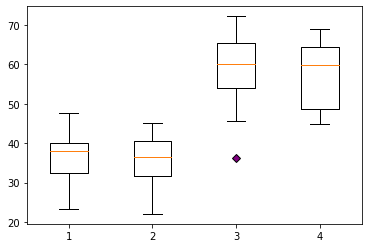

In [332]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_data = [tumor_vol_data_cap, tumor_vol_data_ram, tumor_vol_data_inf, tumor_vol_data_cef]
purple_diamond = dict(markerfacecolor='purple', marker='D')
plt.boxplot(tumor_data, flierprops=purple_diamond)
plt.show()

## Line and Scatter Plots

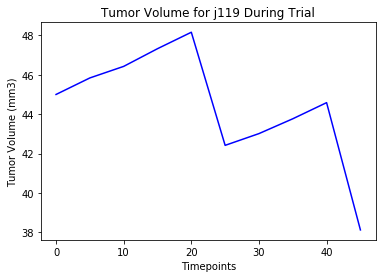

In [339]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#cap_mice_data = clean_mice.loc[clean_mice["Drug Regimen"] == "Capomulin"]
#cap_mice_data["Mouse ID"].unique()
j119_mouse = clean_mice.loc[clean_mice["Mouse ID"] == "j119"]
j119_timepoints = j119_mouse["Timepoint"].to_list()
j119_tum_vol = j119_mouse["Tumor Volume (mm3)"].to_list()
plt.plot(j119_timepoints, j119_tum_vol, color="blue")
plt.title("Tumor Volume for j119 During Trial")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
